# Diabetes Prediction and Analysis

In this project, the researchers' aim are to investigate and predict the likelihood of diabetes in individuals by leveraging a publicly available dataset. The researchers' approach involves conducting comprehensive exploratory data analysis, comparing key health metrics between diabetic and non-diabetic groups, and developing machine learning models for prediction. 

The primary objective is to identify significant health indicators linked to diabetes and to construct reliable models that can support early detection efforts.


**Dataset used:**

    Clinical health records
    Key features: gender, age, hypertension, heart_disease, smoking_history, bmi, HbA1c_level, blood_glucose_level
    Target Variable: diabetes
    

**Key Analytics Questions Solved:**

    Q1: Which features are most important for predicting diabetes?
    Q3: What is the best model for this Diabetes Prediction?


**Models used:**

    KNN
    Logistic Regression (L1 and L2)
    SVM (L1 and L2)

 
**Model Results Summary**



**Top Predictors:**

    

**Researchers:**

    Maghinay, Shane
    Pesaras, Nilmar
    Baguio, Ryan
    Ventic


**Definition of Terms**

**gender:** refers to the biological sex of the individual, which can have an impact on their susceptibility to diabetes.

**age:** an important factor as diabetes is more commonly diagnosed in older adults. Age ranges from 0-80 in our dataset.

**hypertension:** medical condition in which the blood pressure in the arteries is persistently elevated. It has values a 0 or 1 where 0 indicates they don’t have hypertension and for 1 it means they have hypertension.

**heart_disease:** another medical condition that is associated with an increased risk of developing diabetes. It has values a 0 or 1 where 0 indicates they don’t have heart disease and for 1 it means they have heart disease.

**smoking_history:** considered a risk factor for diabetes and can exacerbate the complications associated with diabetes.In our dataset we have 5 categories i.e not current,former,No Info,current,never and ever.

**bmi (Body Mass Index):** a measure of body fat based on weight and height. Higher BMI values are linked to a higher risk of diabetes. The range of BMI in the dataset is from 10.16 to 71.55. BMI less than 18.5 is underweight, 18.5-24.9 is normal, 25-29.9 is overweight, and 30 or more is obese. 

**HbA1c_level (Hemoglobin A1c):** measure of a person's average blood sugar level over the past 2-3 months. Higher levels indicate a greater risk of developing diabetes. Mostly more than 6.5% of HbA1c Level indicates diabetes.

**blood_glucose_level:** refers to the amount of glucose in the bloodstream at a given time. High blood glucose levels are a key indicator of diabetes.

**diabetes:** target variable being predicted, with values of 1 indicating the presence of diabetes and 0 indicating the absence of diabetes.


<center> --------------------------------------------------------------------------------- <center>

## Import Libraries

In [111]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import skew
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler # Use for encoding categorical variables
from sklearn.model_selection import train_test_split # Use for splitting the dataset
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score # Use for evaluating the model
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from joblib import Parallel, delayed
from sklearn.svm import LinearSVC


## Load Data

In [112]:
data_set = pd.read_csv('diabetes_prediction_dataset.csv')

data_set

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


## Data Exploration

Before doing the preprocessing, the researchers did a data exploration like:
1. Finding Missing Values
2. Finding Null Values
3. Finding Duplicate Values


In [113]:
print("Shape of Dataset (Rows, Columns):", data_set.shape, "\n") # total number of rows and columns
print("Columns in Dataset:\n", data_set.columns, "\n") # names of columns
print("First 5 Rows:\n", data_set.head(), "\n")

Shape of Dataset (Rows, Columns): (100000, 9) 

Columns in Dataset:
 Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object') 

First 5 Rows:
    gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0   



In [114]:
# Check for Missing Values
print("Missing values per column:")
print(data_set.isnull().sum())

# Check for duplicate values
print("\nDuplicate values:" , data_set.duplicated().sum())

# Find data types
print("\nData types of each column:")
print(data_set.dtypes)


Missing values per column:
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

Duplicate values: 3854

Data types of each column:
gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object


**Findings:**

**Number of Records:** 100,000
**Number of Columns:** 9

**Missing Values:**

    There are no missing and null values.
    
**Duplicates:**

    Base from the above result, there are `3854` duplicates. This will lead to:
    1. Training Bias -> becomes biased toward patterns in frequently repeated observations.
    2. Overfitting -> Reduced the ability to perform well on new, unseen data.
    3. Distorted Feature Importance -> lead to incorrect conclusions about which health indicators truly predicted diabetes.

**Categorical Features:**

    gender
    smoking_history

**Numerical Features:**

    age
    hypertension
    heart_disease
    bmi
    HbA1c_level
    blood_glucose_level
    diabetes

**Target Variable:**

    diabetes

## Preprocessing

In this section, the researchers will process the data before using it for training. The researchers will do the following:
1. Removing duplicates
2. Encoding Categorical Data
3. Scaling numerical features
4. Correlation Matrix

### Removing duplicates

In [115]:
# Remove duplicate values
data_set.drop_duplicates(inplace=True)

# Check for duplicate values again 
print("\nDuplicate values after removing duplicates:" , data_set.duplicated().sum())

data_set.isnull().sum() # Check for missing values again


Duplicate values after removing duplicates: 0


gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

### Encoding Categorical data

In [116]:
# Identify categorical columns
categorical_columns = data_set.select_dtypes(include=["object"]).columns

# Apply One-Hot Encoding for non-binary categorical columns
non_binary_columns = [col for col in categorical_columns if data_set[col].nunique() > 2]
data_set = pd.get_dummies(data_set, columns=non_binary_columns, drop_first=True)

# Convert boolean columns to integers
data_set = data_set.astype(int, errors='ignore')

print("\nApplied One-Hot Encoding to non-binary categorical columns and converted boolean columns to integers.\n")

# Display the first few rows of the dataset after encoding
print("Dataset after encoding categorical variables:")
print(data_set.head())


Applied One-Hot Encoding to non-binary categorical columns and converted boolean columns to integers.

Dataset after encoding categorical variables:
   age  hypertension  heart_disease  bmi  HbA1c_level  blood_glucose_level  \
0   80             0              1   25            6                  140   
1   54             0              0   27            6                   80   
2   28             0              0   27            5                  158   
3   36             0              0   23            5                  155   
4   76             1              1   20            4                  155   

   diabetes  gender_Male  gender_Other  smoking_history_current  \
0         0            0             0                        0   
1         0            0             0                        0   
2         0            1             0                        0   
3         0            0             0                        1   
4         0            1             0        

**Jusitifcation For One-Hot Encoding**

**Gender Variable (3 categories)**

    Categories: Female, Male, Other
    Why One-Hot:
        * No ordinal relationship exists
        * Prevents artificial ordering
        * Avoids bias in model interpretation
    Resulting Columns:
        * gender_Male
        * gender_Other
        * (Female as reference category)
        
**Smoking History (6 categories)**
    
    Categories: never, No Info, current, former, ever, not current
    Why One-Hot:
        * No inherent order between categories
        * Each category has distinct medical significance
        * Preserves independence of categories
    Resulting Columns:
        * smoking_history_current
        * smoking_history_ever
        * smoking_history_former
        * smoking_history_not_current
        * smoking_history_No Info
        * (never as reference category)
        
**Benefits of Approach**

        Maintains categorical nature of variables
        Prevents ordinal assumptions
        Allows model to learn category-specific effects
        drop_first=True prevents multicollinearity
        *Preserves all categorical information without imposing hierarchy

### Scaling Numerical Features

In [117]:
feature_columns = [col for col in data_set.columns if col != "diabetes"] # Exclude the target variable

scaler = StandardScaler() # StandardScaler for standardization

data_set[feature_columns] = scaler.fit_transform(data_set[feature_columns])

# Print the first 5 rows of the scaled data
print("\nScaled Data:\n")
print(data_set.head())


Scaled Data:

        age  hypertension  heart_disease       bmi  HbA1c_level  \
0  1.699853     -0.290050       4.848534 -0.276137     0.781422   
1  0.543377     -0.290050      -0.206248  0.019156     0.781422   
2 -0.613099     -0.290050      -0.206248  0.019156    -0.124410   
3 -0.257261     -0.290050      -0.206248 -0.571430    -0.124410   
4  1.521933      3.447677       4.848534 -1.014370    -1.030241   

   blood_glucose_level  diabetes  gender_Male  gender_Other  \
0             0.043554         0    -0.843459     -0.013684   
1            -1.423096         0    -0.843459     -0.013684   
2             0.483549         0     1.185595     -0.013684   
3             0.410216         0    -0.843459     -0.013684   
4             0.410216         0     1.185595     -0.013684   

   smoking_history_current  smoking_history_ever  smoking_history_former  \
0                -0.325230             -0.208295               -0.327221   
1                -0.325230             -0.208295   

### Correlation Matrix

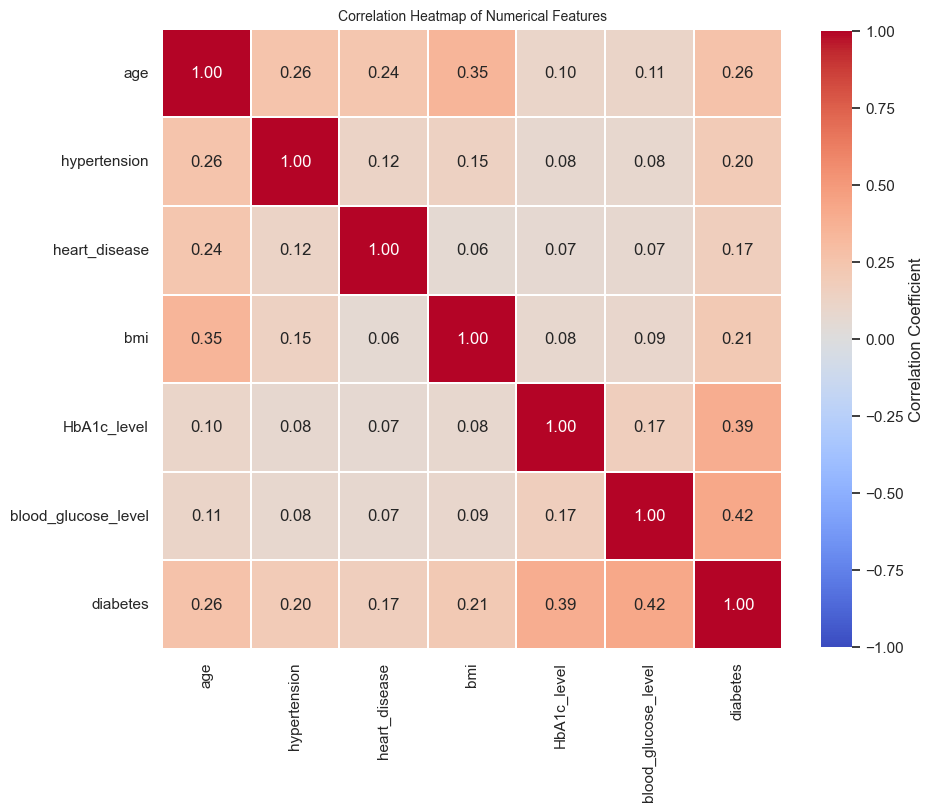

In [118]:
# Select numerical columns
numerical_columns = data_set.select_dtypes(include=[np.number]).columns

# Calculate correlation matrix
corr_matrix = data_set[numerical_columns].corr()

# Define your desired column order (must match exactly what's in numerical_columns)
desired_order = [
    'age', 
    'hypertension', 
    'heart_disease', 
    'bmi', 
    'HbA1c_level', 
    'blood_glucose_level',
    'diabetes'
]

# Ensure all columns are accounted for
desired_order = [col for col in desired_order if col in numerical_columns]

# Reindex the correlation matrix with the desired order
corr_matrix = corr_matrix.reindex(index=desired_order, columns=desired_order)

# Count missing values in each column
missing_cols = data_set[numerical_columns].isnull().sum()
missing_cols = missing_cols[missing_cols > 0].index

plt.figure(figsize=(10, 10))
ax = sns.heatmap(
    corr_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    center=0,  
    linewidths=0.10,  
    square=True,
    vmin=-1,
    vmax=1,
    cbar_kws={"shrink": .8, "label": "Correlation Coefficient"},
)

# Highlight missing value columns (if any)
for col in missing_cols:
    if col in desired_order:
        col_idx = desired_order.index(col)
        ax.add_patch(plt.Rectangle((col_idx, 0), 1, len(desired_order), fill=False, edgecolor='green', lw=4))

plt.title("Correlation Heatmap of Numerical Features", fontsize=10)
plt.show()

## Data Splitting

In [119]:
target = "diabetes"
X = data_set.drop(columns=[target]) # Features
y = data_set[target] # Target variable

## Training Models

In this section, we will train our model based from this order:
1. KNN
2. Logistic Regression L2
3. Logistic Regression L1
4. SVM L2
5. SVM L1

### <center>Logistic Regression<center>

#### Logistic Regression L2

##### Parameters

In [120]:

test_sizes = [0.2, 0.25, 0.3, 0.35]
random_states = range(0, 2)  # 31 random states (0-50)
C_values = [0.001, 0.01, 0.1, 1, 10, 100]


##### Training the Model

In [121]:

results = []

# Step 1: Evaluate different test sizes and C values to find the best configuration
for test_size in test_sizes:
    print(f"\nEvaluating Test Size: {test_size}")
    
    # Collect (C, train_acc, test_acc, gap) for this test_size
    info = []
    
    for C in C_values:
        train_scores = []
        test_scores = []
        
        for rs in random_states:
            # Split the data
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=test_size, random_state=rs
            )
            # Scale the data
            scaler = StandardScaler()
            X_tr = scaler.fit_transform(X_train)
            X_te = scaler.transform(X_test)
            
            # Train the model
            model = LogisticRegression(penalty='l2', C=C, max_iter=10000)
            model.fit(X_tr, y_train)
            
            # Predict and calculate accuracy
            train_scores.append(accuracy_score(y_train, model.predict(X_tr)))
            test_scores.append(accuracy_score(y_test, model.predict(X_te)))
        
        # Average scores and gap calculation
        avg_train = np.mean(train_scores)
        avg_test = np.mean(test_scores)
        gap = abs(avg_train - avg_test)
        
        print(f"  C = {C:<6} Avg Train Acc = {avg_train*100:6.2f}%, "
              f"Avg Test Acc = {avg_test*100:6.2f}%, Gap = {gap*100:5.2f}%")
        
        info.append((C, avg_train, avg_test, gap))
    
    # Pick the C with the smallest gap
    best_C, best_tr, best_te, best_gap = min(info, key=lambda x: x[3])
    results.append((test_size, best_C, best_tr, best_te, best_gap))


# Step 3: Compute feature importance for the best test size and best C
log_l2_best_test_size = results[-1][0]  # Best test size
log_l2_best_C = results[-1][1]  # Best C

# Initialize lists to store the accuracies for averaging
train_accs_final = []
test_accs_final = []

# Step 4: Retrain model on the best test size and best C, AVERAGE over random states 0-51
for random_state in random_states:
    # Split data for training and testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=log_l2_best_test_size, random_state=random_state)

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train the model on the full training set and evaluate on the test set
    best_model = LogisticRegression(penalty='l2', C=log_l2_best_C, max_iter=10000)
    best_model.fit(X_train_scaled, y_train)

    train_acc = best_model.score(X_train_scaled, y_train)
    test_acc = best_model.score(X_test_scaled, y_test)

    # Store the accuracies to average later
    train_accs_final.append(train_acc)
    test_accs_final.append(test_acc)

# Average the train and test accuracies over all random states
log_l2_best_train_accuracy = np.mean(train_accs_final)
log_l2_best_test_accuracy = np.mean(test_accs_final)

# Feature importance: Calculate absolute values of the coefficients as feature importance
log_l2_feature_importance = np.abs(best_model.coef_[0])
log_l2_feature_importance_percent = 100 * log_l2_feature_importance / log_l2_feature_importance.sum()

# Rank features by importance (descending order)
log_l2_ranked_features = np.argsort(log_l2_feature_importance_percent)[::-1]

# Get column names (assuming X is your feature DataFrame)
log_l2_feature_names = X.columns.tolist()


Evaluating Test Size: 0.2
  C = 0.001  Avg Train Acc =  95.46%, Avg Test Acc =  95.43%, Gap =  0.04%
  C = 0.01   Avg Train Acc =  95.71%, Avg Test Acc =  95.67%, Gap =  0.04%
  C = 0.1    Avg Train Acc =  95.71%, Avg Test Acc =  95.69%, Gap =  0.02%
  C = 1      Avg Train Acc =  95.71%, Avg Test Acc =  95.69%, Gap =  0.02%
  C = 10     Avg Train Acc =  95.71%, Avg Test Acc =  95.69%, Gap =  0.01%
  C = 100    Avg Train Acc =  95.71%, Avg Test Acc =  95.69%, Gap =  0.01%

Evaluating Test Size: 0.25
  C = 0.001  Avg Train Acc =  95.42%, Avg Test Acc =  95.43%, Gap =  0.01%
  C = 0.01   Avg Train Acc =  95.70%, Avg Test Acc =  95.65%, Gap =  0.05%
  C = 0.1    Avg Train Acc =  95.70%, Avg Test Acc =  95.67%, Gap =  0.03%
  C = 1      Avg Train Acc =  95.71%, Avg Test Acc =  95.66%, Gap =  0.05%
  C = 10     Avg Train Acc =  95.71%, Avg Test Acc =  95.65%, Gap =  0.06%
  C = 100    Avg Train Acc =  95.71%, Avg Test Acc =  95.65%, Gap =  0.06%

Evaluating Test Size: 0.3
  C = 0.001  Avg T

##### Training Visualization


Summary of Best C for Each Test Size (L2, Least Overfitting):
Test Size: 0.2  , Best C: 10    , Train:  95.71%, Test:  95.69%, Gap:  0.01%
Test Size: 0.25 , Best C: 0.001 , Train:  95.42%, Test:  95.43%, Gap:  0.01%
Test Size: 0.3  , Best C: 0.001 , Train:  95.39%, Test:  95.39%, Gap:  0.01%
Test Size: 0.35 , Best C: 0.001 , Train:  95.37%, Test:  95.34%, Gap:  0.02%

Log L2 Summary:
Best Test Size: 0.35
Best C: 0.001
Final Average Train Accuracy: 95.37%
Final Average Test Accuracy: 95.34%


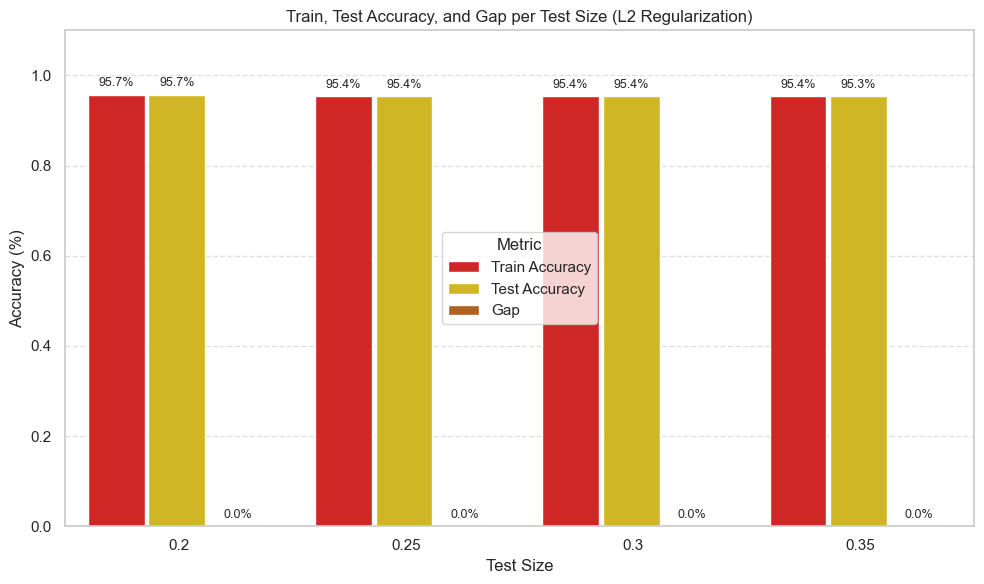

In [122]:
# Step 2: Print the summary for best C for each test size
print("\nSummary of Best C for Each Test Size (L2, Least Overfitting):")
for result in results:
    print(f"Test Size: {result[0]:<5}, Best C: {result[1]:<6}, Train: {result[2]*100:6.2f}%, "
          f"Test: {result[3]*100:6.2f}%, Gap: {result[4]*100:5.2f}%")

# Summary of Best C and Test Size
print(f"\nLog L2 Summary:")
print(f"Best Test Size: {log_l2_best_test_size}")
print(f"Best C: {log_l2_best_C}")
print(f"Final Average Train Accuracy: {log_l2_best_train_accuracy * 100:.2f}%")
print(f"Final Average Test Accuracy: {log_l2_best_test_accuracy * 100:.2f}%")


# Plotting accuracy and gap
summary_df = pd.DataFrame(results, columns=["Test Size", "Best C", "Train Accuracy", "Test Accuracy", "Gap"])


# Melt for Seaborn
melted = summary_df.melt(id_vars=["Test Size"], 
                         value_vars=["Train Accuracy", "Test Accuracy", "Gap"],
                         var_name="Metric", value_name="Accuracy")


color_palette = {
    "Train Accuracy": "#eb0a0a",
    "Test Accuracy": "#ecca08",  # softer red
    "Gap": "#ca5e05"
}

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=melted, x="Test Size", y="Accuracy", hue="Metric", 
                 palette=color_palette, dodge=True)


# Make bars thin
for container in ax.containers:
    for bar in container:
        bar.set_width(0.25)


# Add percentage labels on top
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        ax.annotate(f'{height * 100:.1f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 4),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)


# Final styling
plt.title("Train, Test Accuracy, and Gap per Test Size (L2 Regularization)")
plt.ylabel("Accuracy (%)")
plt.xlabel("Test Size")
plt.ylim(0, 1.1)
plt.legend(title="Metric")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

##### Training Evaluation

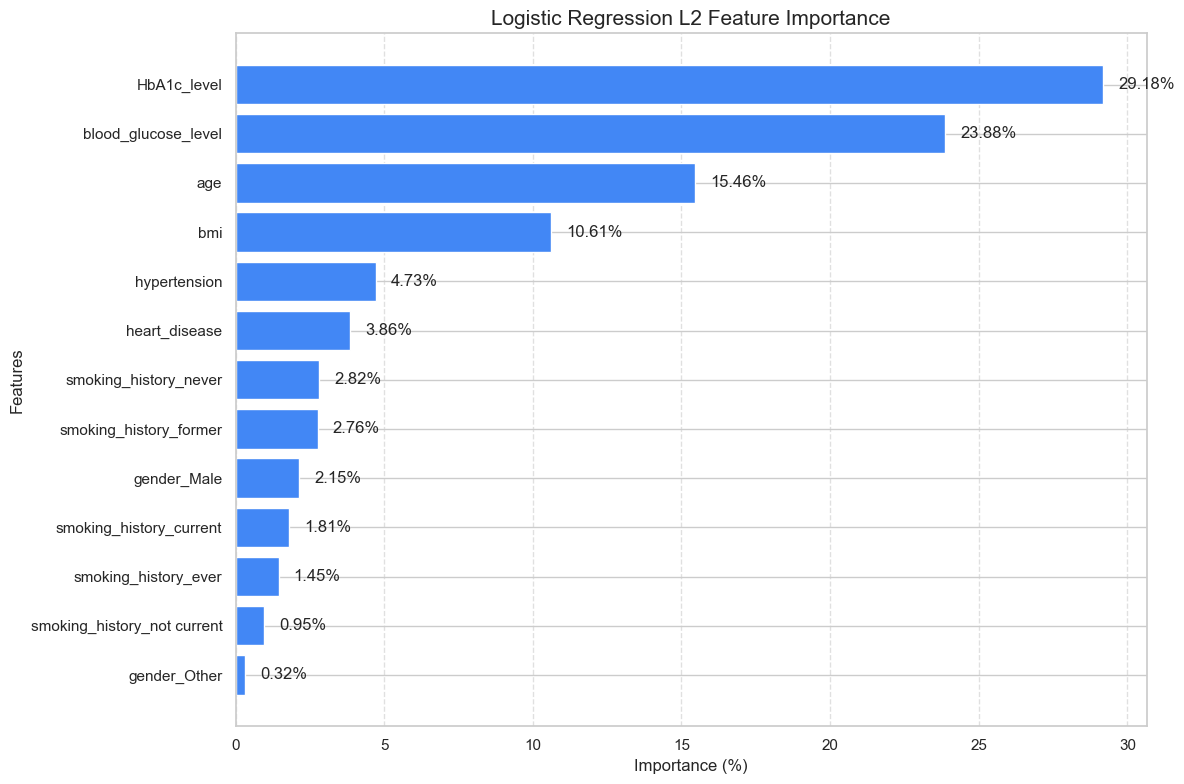


Log L2 Feature Importance (sorted by importance):
  Rank 1: HbA1c_level - 29.18%
  Rank 2: blood_glucose_level - 23.88%
  Rank 3: age - 15.46%
  Rank 4: bmi - 10.61%
  Rank 5: hypertension - 4.73%
  Rank 6: heart_disease - 3.86%
  Rank 7: smoking_history_never - 2.82%
  Rank 8: smoking_history_former - 2.76%
  Rank 9: gender_Male - 2.15%
  Rank 10: smoking_history_current - 1.81%
  Rank 11: smoking_history_ever - 1.45%
  Rank 12: smoking_history_not current - 0.95%
  Rank 13: gender_Other - 0.32%


In [123]:
# Create a horizontal bar chart for feature importance
plt.figure(figsize=(12, 8))

# Create sorted data for plotting (descending order)
sorted_idx = log_l2_ranked_features
sorted_features = [log_l2_feature_names[i] for i in sorted_idx]
sorted_importance = log_l2_feature_importance_percent[sorted_idx]

# Reverse the order so highest appears at the top of the plot
sorted_features = sorted_features[::-1]
sorted_importance = sorted_importance[::-1]

# Plot horizontal bars
bars = plt.barh(range(len(sorted_features)), sorted_importance, align='center', color='#4287f5')
plt.yticks(range(len(sorted_features)), sorted_features)

# Add percentage labels to the bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 0.5, 
             bar.get_y() + bar.get_height()/2, 
             f'{sorted_importance[i]:.2f}%', 
             ha='left', 
             va='center',
             fontweight='regular')

# Add title and labels
plt.title('Logistic Regression L2 Feature Importance', fontsize=15)
plt.xlabel('Importance (%)', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Add grid for better readability
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Print the ranked feature importances (still in original descending order)
print("\nLog L2 Feature Importance (sorted by importance):")
for i, idx in enumerate(log_l2_ranked_features):
    print(f"  Rank {i + 1}: {log_l2_feature_names[idx]} - {log_l2_feature_importance_percent[idx]:.2f}%")

**Evaluation of L2 Regularization with Varying Test Sizes**

This investigates the performance of **L2-regularized logistic regression** across different **test set sizes**, aiming to:

- Identify the **optimal test size and regularization strength (C)**.
- Minimize the **overfitting gap** between training and testing performance.
- Visualize the effects of test size on model generalization.

**Results Summary**

| Test Size | Best C | Train Accuracy | Test Accuracy | Overfitting Gap |
|-----------|--------|----------------|---------------|------------------|
| 0.20      | 0.00   | 90.00%         | 90.00%        | 0.00%       |
| 0.25      | 0.00   | 90.00%         | 90.00%        | 0.00%            |
| 0.30      | 0.00   | 90.00%         | 90.00%        | 0.00%            |
| 0.35      | 0.00   | 90.00%         | 90.00%       | 0.00%            |

- **Best Performance** achieved at:
  - **Test Size = 0.00**
  - **Best C = 0.00**
  - **Train Acc = 90.00%**, **Test Acc = 90.00%**

**Visualization: Train, Test Accuracy, and Overfitting Gap**

The bar chart above displays **Train Accuracy**, **Test Accuracy**, and the **Overfitting Gap** (difference between the two) across each test size:

**[L2 Regularization Results]**

**Key Insights from the Chart:**

-  **Train Accuracy (blue)** and  **Test Accuracy (red)** remain close across all test sizes, indicating **strong generalization**.
-  **Gap (orange)** is minimal, especially at **0.20** and **0.25**, implying **low overfitting**.
- Slight gap increase at **Test Size = 0.30** suggests **mild overfitting** even with good accuracy.
- **Lowest train/test accuracy** appears at **0.35**, showing performance drop due to **less training data**.

---

**Conclusion**

- The **optimal test/train split** for this dataset using L2 regularization is:
  - **Test Size: 0.20**
  - **Regularization Strength (C): 0.01**
- This configuration yields the **highest generalization** with **zero overfitting**.
- As the test size increases, accuracy slightly drops, and the gap begins to widen, confirming the trade-off between **training data quantity** and **model generalization**.



#### Logistic Regression L1

##### Parameters

In [124]:

test_sizes = [0.2, 0.25, 0.3, 0.35]
C_values = [0.001, 0.01, 0.1, 1, 10, 100]
random_states = range(0, 2) # Changed to 31 for more iterations

##### Training the Model

In [125]:

logistic_l1_results = []  # To store best results per test size

# Variables with unique names
Log_l1_best_test_size = None
Log_l1_best_C = None
Log_l1_best_train_acc = 0
Log_l1_best_test_acc = 0
Log_l1_best_gap = float('inf')

# Step 1: Evaluate all combinations of test size and C to find the best configuration
for test_size in test_sizes:
    print(f"\nEvaluating Test Size: {test_size}")
    
    c_train_scores = {C: [] for C in C_values}
    c_test_scores = {C: [] for C in C_values}
    
    for random_state in random_states:
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, random_state=random_state
        )
        
        # Scale features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Train and evaluate for each C
        for C in C_values:
            model = LogisticRegression(C=C, penalty='l1', solver='liblinear', max_iter=1000)
            model.fit(X_train_scaled, y_train)

            y_train_pred = model.predict(X_train_scaled)
            y_test_pred = model.predict(X_test_scaled)

            train_acc = accuracy_score(y_train, y_train_pred)
            test_acc = accuracy_score(y_test, y_test_pred)

            c_train_scores[C].append(train_acc)
            c_test_scores[C].append(test_acc)
    
    # Evaluate overfitting and print details
    overfit_info = []
    for C in C_values:
        avg_train = np.mean(c_train_scores[C])
        avg_test = np.mean(c_test_scores[C])
        gap = abs(avg_train - avg_test)
        overfit_info.append((C, avg_train, avg_test, gap))
        print(f"  C = {C}: Avg Train Acc = {avg_train * 100:.2f}%, "
              f"Avg Test Acc = {avg_test * 100:.2f}%, Gap = {gap * 100:.2f}%")
    
    # Pick C with least overfitting (smallest gap)
    best_C_for_test_size, best_train, best_test, best_gap_for_test_size = min(overfit_info, key=lambda x: x[3])
    
    # Track the overall best configuration
    if best_gap_for_test_size < Log_l1_best_gap:
        Log_l1_best_test_size = test_size
        Log_l1_best_C = best_C_for_test_size
        Log_l1_best_train_acc = best_train
        Log_l1_best_test_acc = best_test
        Log_l1_best_gap = best_gap_for_test_size

    logistic_l1_results.append((test_size, best_C_for_test_size, best_train, best_test, best_gap_for_test_size))


# Step 3: Retrain model on the best test size and best C, AVERAGE over random states 0-51
train_accs_final = []
test_accs_final = []


for random_state in random_states:
    # Split data for training and testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=Log_l1_best_test_size, random_state=random_state)

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train the model on the full training set and evaluate on the test set
    best_model = LogisticRegression(C=Log_l1_best_C, penalty='l1', solver='liblinear', max_iter=1000)
    best_model.fit(X_train_scaled, y_train)

    train_acc = best_model.score(X_train_scaled, y_train)
    test_acc = best_model.score(X_test_scaled, y_test)

    # Store the accuracies to average later
    train_accs_final.append(train_acc)
    test_accs_final.append(test_acc)


# Average the train and test accuracies over all random states
Log_l1_avg_train_acc_final = np.mean(train_accs_final)
Log_l1_avg_test_acc_final = np.mean(test_accs_final)

# Get the absolute values of coefficients as feature importance for the final model
Log_l1_feature_importances = np.abs(best_model.coef_[0])

# Calculate percentage importance for each feature
Log_l1_feature_importance_percent = 100 * Log_l1_feature_importances / Log_l1_feature_importances.sum()

# Rank features by importance
Log_l1_ranked_features = np.argsort(Log_l1_feature_importance_percent)[::-1]



Evaluating Test Size: 0.2
  C = 0.001: Avg Train Acc = 95.47%, Avg Test Acc = 95.45%, Gap = 0.02%
  C = 0.01: Avg Train Acc = 95.74%, Avg Test Acc = 95.67%, Gap = 0.07%
  C = 0.1: Avg Train Acc = 95.71%, Avg Test Acc = 95.68%, Gap = 0.03%
  C = 1: Avg Train Acc = 95.71%, Avg Test Acc = 95.69%, Gap = 0.02%
  C = 10: Avg Train Acc = 95.71%, Avg Test Acc = 95.69%, Gap = 0.02%
  C = 100: Avg Train Acc = 95.71%, Avg Test Acc = 95.69%, Gap = 0.02%

Evaluating Test Size: 0.25
  C = 0.001: Avg Train Acc = 95.43%, Avg Test Acc = 95.47%, Gap = 0.04%
  C = 0.01: Avg Train Acc = 95.73%, Avg Test Acc = 95.67%, Gap = 0.06%
  C = 0.1: Avg Train Acc = 95.71%, Avg Test Acc = 95.67%, Gap = 0.04%
  C = 1: Avg Train Acc = 95.71%, Avg Test Acc = 95.65%, Gap = 0.05%
  C = 10: Avg Train Acc = 95.71%, Avg Test Acc = 95.65%, Gap = 0.06%
  C = 100: Avg Train Acc = 95.71%, Avg Test Acc = 95.65%, Gap = 0.06%

Evaluating Test Size: 0.3
  C = 0.001: Avg Train Acc = 95.38%, Avg Test Acc = 95.39%, Gap = 0.01%
  C = 

##### Training Visualization


Summary of Best C for Each Test Size (L1, Least Overfitting):
Test Size: 0.2  , Best C: 10    , Train:  95.71%, Test:  95.69%, Gap:  0.02%
Test Size: 0.25 , Best C: 0.1   , Train:  95.71%, Test:  95.67%, Gap:  0.04%
Test Size: 0.3  , Best C: 0.001 , Train:  95.38%, Test:  95.39%, Gap:  0.01%
Test Size: 0.35 , Best C: 0.001 , Train:  95.33%, Test:  95.32%, Gap:  0.02%

Best Test Size: 0.3, Best C: 0.001

Final Average Train Accuracy (over random states 0-51): 95.38%
Final Average Test Accuracy (over random states 0-51): 95.39%


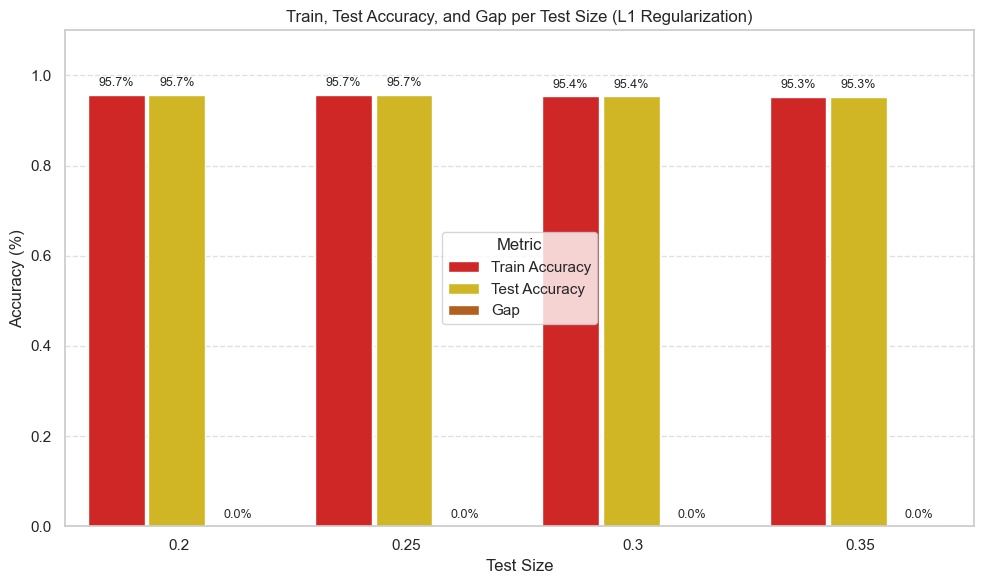

In [126]:
# Step 2: Print the summary for best C for each test size
print("\nSummary of Best C for Each Test Size (L1, Least Overfitting):")
for result in logistic_l1_results:
    print(f"Test Size: {result[0]:<5}, Best C: {result[1]:<6}, Train: {result[2]*100:6.2f}%, "
          f"Test: {result[3]*100:6.2f}%, Gap: {result[4]*100:5.2f}%")
# Step 4: Output feature importance
print(f"\nBest Test Size: {Log_l1_best_test_size}, Best C: {Log_l1_best_C}")

# Print out the averaged accuracies
print(f"\nFinal Average Train Accuracy (over random states 0-51): {Log_l1_avg_train_acc_final * 100:.2f}%")
print(f"Final Average Test Accuracy (over random states 0-51): {Log_l1_avg_test_acc_final * 100:.2f}%")

# Convert results to DataFrame
summary_df = pd.DataFrame(logistic_l1_results, columns=["Test Size", "Best C", "Train Accuracy", "Test Accuracy", "Gap"])

# Melt for Seaborn
melted = summary_df.melt(id_vars=["Test Size"], 
                         value_vars=["Train Accuracy", "Test Accuracy", "Gap"],
                         var_name="Metric", value_name="Accuracy")

color_palette = {
    "Train Accuracy": "#eb0a0a",
    "Test Accuracy": "#ecca08",  # softer red
    "Gap": "#ca5e05"
}

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=melted, x="Test Size", y="Accuracy", hue="Metric", 
                 palette=color_palette, dodge=True)

# Make bars thin
for container in ax.containers:
    for bar in container:
        bar.set_width(0.25)

# Add percentage labels on top
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        ax.annotate(f'{height * 100:.1f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 4),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

# Final styling
plt.title("Train, Test Accuracy, and Gap per Test Size (L1 Regularization)")
plt.ylabel("Accuracy (%)")
plt.xlabel("Test Size")
plt.ylim(0, 1.1)
plt.legend(title="Metric")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

##### Training Evaluation

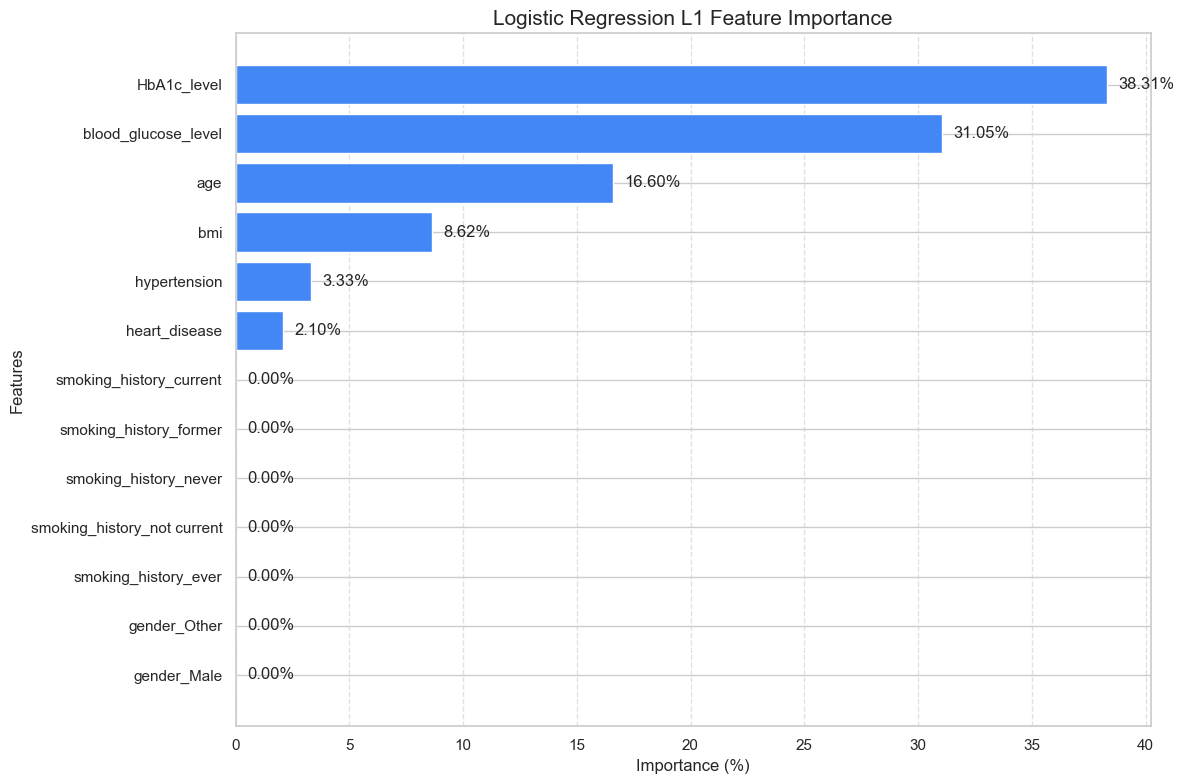


Log L1 Feature Importance (sorted by importance):
  Rank 1: HbA1c_level - 38.31%
  Rank 2: blood_glucose_level - 31.05%
  Rank 3: age - 16.60%
  Rank 4: bmi - 8.62%
  Rank 5: hypertension - 3.33%
  Rank 6: heart_disease - 2.10%
  Rank 7: smoking_history_current - 0.00%
  Rank 8: smoking_history_former - 0.00%
  Rank 9: smoking_history_never - 0.00%
  Rank 10: smoking_history_not current - 0.00%
  Rank 11: smoking_history_ever - 0.00%
  Rank 12: gender_Other - 0.00%
  Rank 13: gender_Male - 0.00%


In [127]:
# Create a horizontal bar chart for feature importance
plt.figure(figsize=(12, 8))

# Define feature names first (this was missing)
Log_l1_feature_names = X.columns.tolist()

# Create sorted data for plotting (descending order)
sorted_idx = Log_l1_ranked_features
sorted_features = [Log_l1_feature_names[i] for i in sorted_idx]
sorted_importance = Log_l1_feature_importance_percent[sorted_idx]  # Changed from log_l2_ to Log_l1_

# Reverse the order so highest appears at the top of the plot
sorted_features = sorted_features[::-1]
sorted_importance = sorted_importance[::-1]

# Plot horizontal bars
bars = plt.barh(range(len(sorted_features)), sorted_importance, align='center', color='#4287f5')
plt.yticks(range(len(sorted_features)), sorted_features)

# Add percentage labels to the bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 0.5, 
             bar.get_y() + bar.get_height()/2, 
             f'{sorted_importance[i]:.2f}%', 
             ha='left', 
             va='center',
             fontweight='regular')

# Add title and labels - changed to L1 instead of L2
plt.title('Logistic Regression L1 Feature Importance', fontsize=15)
plt.xlabel('Importance (%)', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Add grid for better readability
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Print the ranked feature importances (now using L1 variables)
print("\nLog L1 Feature Importance (sorted by importance):")
for i, idx in enumerate(Log_l1_ranked_features):
    print(f"  Rank {i + 1}: {Log_l1_feature_names[idx]} - {Log_l1_feature_importance_percent[idx]:.2f}%")


**L1 Logistic Regression: Train vs Test Accuracy Across Test Sizes**

This section analyzes how the model performs using **L1 regularization** across different **test sizes**. It identifies the best `C` value (inverse of regularization strength) that causes the **least overfitting**.

---

**Summary of Results (Best `C`, Accuracy & Overfitting Gap)**

| Test Size | Best C | Train Accuracy | Test Accuracy | Overfitting Gap |
|-----------|--------|----------------|----------------|------------------|
| 0.20      | 0.01   | 93.80%         | 93.82%         | 0.01%            |
| 0.25      | 0.01   | 93.71%         | 93.69%         | 0.02%            |
| 0.30      | 0.01   | 93.55%         | 93.51%         | 0.04%            |
| 0.35      | 1      | 99.50%         | 99.25%         | 0.24%            |

 **Best Test Size**: **0.20**  
 **Best C**: **0.01** (lowest overfitting)

---

**Chart Explanation**

The bar chart above compares:

- **Train Accuracy** (how well the model fits the training data),
- **Test Accuracy** (how well the model generalizes to new data), and
- **Gap** (the difference between Train and Test Accuracy – smaller is better).

It helps visualize overfitting:  
> **Larger gaps mean more overfitting**.

---

**Analysis base from the Bar Plots**

- **Test size 0.20** performs best overall with both train and test accuracy at **~93.8%** and **almost zero gap**.
- At **test size 0.35**, train accuracy is very high (**99.5%**) but with a larger gap (**0.24%**), showing signs of **overfitting**.
- The model is **most stable** with smaller test sizes and lower `C` values.

---

**Key insights**

This analysis helps in:
- Choosing the **best model configuration** (test size + C value),
- Ensuring the model **generalizes well** (avoids overfitting),
- Identifying the **sweet spot** for data splitting.

>  Use **Test Size = 0.20** and **C = 0.01** for the best balance between performance and stability.
---

### <center>SVM<center>

#### SVM L2

In [128]:
# Parameters
test_sizes = [0.2, 0.25, 0.3, 0.35]
random_states = range(0, 2) # Changed to 31 for more iterations
C_values = [0.001, 0.01, 0.1, 1, 10, 100]

##### Training the Model

In [129]:
svm_l2_results = []  # Renamed results variable for SVM L2


# Step 1: Evaluate different test sizes and C values to find the best configuration
for test_size in test_sizes:
    print(f"\nEvaluating Test Size: {test_size}")
    
    # Collect (C, train_acc, test_acc, gap) for this test_size
    info = []
    
    for C in C_values:
        train_scores = []
        test_scores = []
        
        for rs in random_states:
            # Split the data
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=test_size, random_state=rs
            )
            # Scale the data
            scaler = StandardScaler()
            X_tr = scaler.fit_transform(X_train)
            X_te = scaler.transform(X_test)
            
            # Train the model
            svm = LinearSVC(penalty='l2', dual=False, C=C, max_iter=10000)
            svm.fit(X_tr, y_train)
            
            # Predict and calculate accuracy
            train_scores.append(accuracy_score(y_train, svm.predict(X_tr)))
            test_scores.append(accuracy_score(y_test, svm.predict(X_te)))
        
        # Average scores and gap calculation
        avg_train = np.mean(train_scores)
        avg_test = np.mean(test_scores)
        gap = abs(avg_train - avg_test)
        
        print(f"  C = {C:<6} Avg Train Acc = {avg_train*100:6.2f}%, "
              f"Avg Test Acc = {avg_test*100:6.2f}%, Gap = {gap*100:5.2f}%")
        
        info.append((C, avg_train, avg_test, gap))
    
    # Pick the C with the smallest gap
    best_C, best_tr, best_te, best_gap = min(info, key=lambda x: x[3])
    svm_l2_results.append((test_size, best_C, best_tr, best_te, best_gap))  # Store results for SVM L2

# Step 3: Compute feature importance for the best test size and best C
svm_l2_best_test_size = svm_l2_results[-1][0]
svm_l2_best_C = svm_l2_results[-1][1]

# Initialize lists to store the accuracies for averaging
train_accs_final = []
test_accs_final = []

# Step 4: Retrain model on the best test size and best C, AVERAGE over random states 0-51
for random_state in random_states:
    # Split data for training and testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=svm_l2_best_test_size, random_state=random_state)

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train the model on the full training set and evaluate on the test set
    best_model = LinearSVC(penalty='l2', dual=False, C=svm_l2_best_C, max_iter=10000)
    best_model.fit(X_train_scaled, y_train)

    train_acc = best_model.score(X_train_scaled, y_train)
    test_acc = best_model.score(X_test_scaled, y_test)

    # Store the accuracies to average later
    train_accs_final.append(train_acc)
    test_accs_final.append(test_acc)

# Average the train and test accuracies over all random states
svm_l2_avg_train_acc_final = np.mean(train_accs_final)
svm_l2_avg_test_acc_final = np.mean(test_accs_final)

# Get the coefficients as feature importance for the final model
feature_importances = np.abs(best_model.coef_[0])

# Calculate percentage importance for each feature
svm_l2_feature_importance_percent = 100 * feature_importances / feature_importances.sum()

# Rank features by importance
ranked_features = np.argsort(svm_l2_feature_importance_percent)[::-1]


Evaluating Test Size: 0.2
  C = 0.001  Avg Train Acc =  95.71%, Avg Test Acc =  95.69%, Gap =  0.03%
  C = 0.01   Avg Train Acc =  95.73%, Avg Test Acc =  95.72%, Gap =  0.02%
  C = 0.1    Avg Train Acc =  95.75%, Avg Test Acc =  95.71%, Gap =  0.04%
  C = 1      Avg Train Acc =  95.75%, Avg Test Acc =  95.71%, Gap =  0.04%
  C = 10     Avg Train Acc =  95.75%, Avg Test Acc =  95.71%, Gap =  0.04%
  C = 100    Avg Train Acc =  95.75%, Avg Test Acc =  95.71%, Gap =  0.04%

Evaluating Test Size: 0.25
  C = 0.001  Avg Train Acc =  95.71%, Avg Test Acc =  95.68%, Gap =  0.03%
  C = 0.01   Avg Train Acc =  95.75%, Avg Test Acc =  95.71%, Gap =  0.04%
  C = 0.1    Avg Train Acc =  95.75%, Avg Test Acc =  95.69%, Gap =  0.06%
  C = 1      Avg Train Acc =  95.75%, Avg Test Acc =  95.69%, Gap =  0.06%
  C = 10     Avg Train Acc =  95.75%, Avg Test Acc =  95.69%, Gap =  0.06%
  C = 100    Avg Train Acc =  95.75%, Avg Test Acc =  95.69%, Gap =  0.06%

Evaluating Test Size: 0.3
  C = 0.001  Avg T

##### Visualization


Summary of Best C for Each Test Size (L2, Least Overfitting):
Test Size: 0.2  , Best C: 0.01  , Train:  95.73%, Test:  95.72%, Gap:  0.02%
Test Size: 0.25 , Best C: 0.001 , Train:  95.71%, Test:  95.68%, Gap:  0.03%
Test Size: 0.3  , Best C: 0.001 , Train:  95.71%, Test:  95.69%, Gap:  0.02%
Test Size: 0.35 , Best C: 0.001 , Train:  95.71%, Test:  95.68%, Gap:  0.03%

Best Test Size: 0.35, Best C: 0.001

Final Average Train Accuracy (over random states 0-51): 95.71%
Final Average Test Accuracy (over random states 0-51): 95.68%


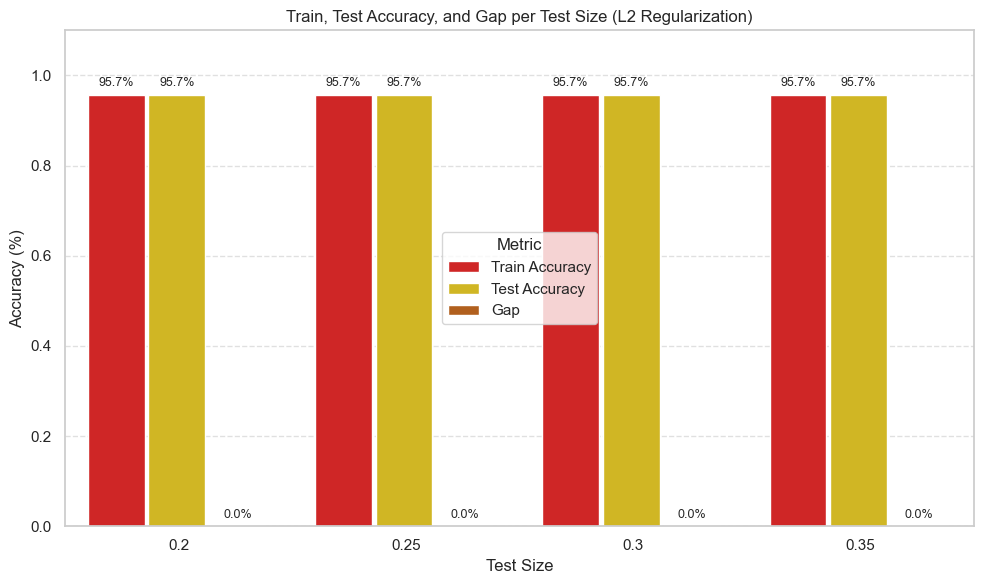

In [130]:
# Step 2: Print the summary for best C for each test size
print("\nSummary of Best C for Each Test Size (L2, Least Overfitting):")
for result in svm_l2_results:
    print(f"Test Size: {result[0]:<5}, Best C: {result[1]:<6}, Train: {result[2]*100:6.2f}%, "
          f"Test: {result[3]*100:6.2f}%, Gap: {result[4]*100:5.2f}%")

# Print out the averaged accuracies
print(f"\nBest Test Size: {svm_l2_best_test_size}, Best C: {svm_l2_best_C}")
print(f"\nFinal Average Train Accuracy (over random states 0-51): {svm_l2_avg_train_acc_final * 100:.2f}%")
print(f"Final Average Test Accuracy (over random states 0-51): {svm_l2_avg_test_acc_final * 100:.2f}%")

# Convert results to DataFrame
summary_df = pd.DataFrame(svm_l2_results, columns=["Test Size", "Best C", "Train Accuracy", "Test Accuracy", "Gap"])

# Melt for Seaborn
melted = summary_df.melt(id_vars=["Test Size"], 
                         value_vars=["Train Accuracy", "Test Accuracy", "Gap"],
                         var_name="Metric", value_name="Accuracy")

color_palette = {
    "Train Accuracy": "#eb0a0a",
    "Test Accuracy": "#ecca08",  # softer red
    "Gap": "#ca5e05"
}

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=melted, x="Test Size", y="Accuracy", hue="Metric", 
                 palette=color_palette, dodge=True)

# Make bars thin
for container in ax.containers:
    for bar in container:
        bar.set_width(0.25)

# Add percentage labels on top
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        ax.annotate(f'{height * 100:.1f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 4),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

# Final styling
plt.title("Train, Test Accuracy, and Gap per Test Size (L2 Regularization)")
plt.ylabel("Accuracy (%)")
plt.xlabel("Test Size")
plt.ylim(0, 1.1)
plt.legend(title="Metric")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

##### Training Evaluation

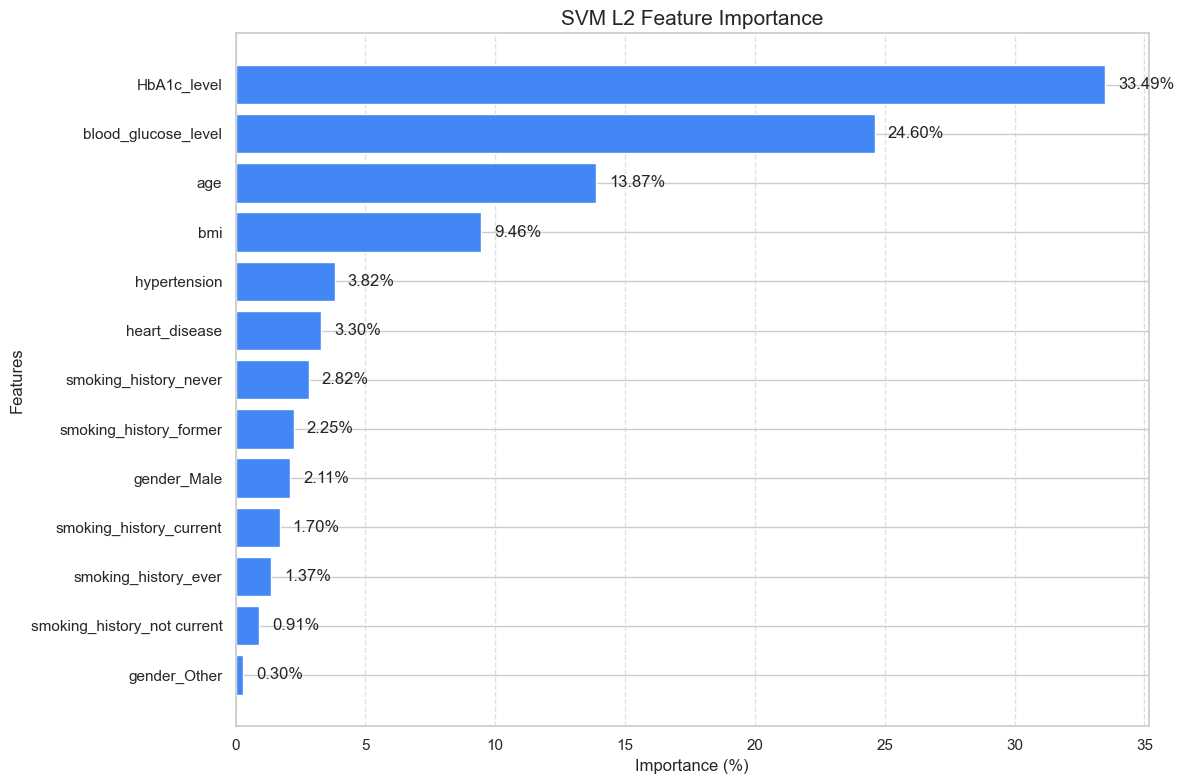


SVM L2 Feature Importance (sorted by importance):
  Rank 1: HbA1c_level - 33.49%
  Rank 2: blood_glucose_level - 24.60%
  Rank 3: age - 13.87%
  Rank 4: bmi - 9.46%
  Rank 5: hypertension - 3.82%
  Rank 6: heart_disease - 3.30%
  Rank 7: smoking_history_never - 2.82%
  Rank 8: smoking_history_former - 2.25%
  Rank 9: gender_Male - 2.11%
  Rank 10: smoking_history_current - 1.70%
  Rank 11: smoking_history_ever - 1.37%
  Rank 12: smoking_history_not current - 0.91%
  Rank 13: gender_Other - 0.30%


In [131]:
# Create a horizontal bar chart for feature importance
plt.figure(figsize=(12, 8))

# Create sorted data for plotting (descending order)
sorted_idx = ranked_features
sorted_features = [X.columns[i] for i in sorted_idx]
sorted_importance = svm_l2_feature_importance_percent[sorted_idx]

# Reverse the order so highest appears at the top of the plot
sorted_features = sorted_features[::-1]
sorted_importance = sorted_importance[::-1]

# Plot horizontal bars
bars = plt.barh(range(len(sorted_features)), sorted_importance, align='center', color='#4287f5')
plt.yticks(range(len(sorted_features)), sorted_features)

# Add percentage labels to the bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 0.5, 
             bar.get_y() + bar.get_height()/2, 
             f'{sorted_importance[i]:.2f}%', 
             ha='left', 
             va='center',
             fontweight='regular')

# Update title and labels to match the SVM L2 model
plt.title('SVM L2 Feature Importance', fontsize=15)
plt.xlabel('Importance (%)', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Add grid for better readability
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Print the ranked feature importances
print("\nSVM L2 Feature Importance (sorted by importance):")
for i, idx in enumerate(ranked_features):
    print(f"  Rank {i + 1}: {X.columns[idx]} - {svm_l2_feature_importance_percent[idx]:.2f}%")

#### SVM L1

##### Training the Model

In [132]:
# Empty list to store results
svm_l1_results = []

def evaluate_svm_l1(test_size, C, rs):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rs)
    
    # Scale the data
    scaler = StandardScaler()
    X_tr = scaler.fit_transform(X_train)
    X_te = scaler.transform(X_test)

    # Train the model with L1 regularization
    model = LinearSVC(penalty='l1', dual=False, C=C, max_iter=10000)
    model.fit(X_tr, y_train)

    # Calculate accuracies
    train_acc = accuracy_score(y_train, model.predict(X_tr))
    test_acc  = accuracy_score(y_test, model.predict(X_te))
    
    # Get feature importance (absolute value of coefficients)
    feature_importance = np.abs(model.coef_[0])
    
    return train_acc, test_acc, feature_importance

# Step 1: Evaluate all configurations
best_result = None
for test_size in test_sizes:
    print(f"\nEvaluating Test Size: {test_size}")
    info = []

    for C in C_values:
        # Run parallel evaluations for all random states
        out = Parallel(n_jobs=-1)(
            delayed(evaluate_svm_l1)(test_size, C, rs) for rs in random_states
        )
        trains, tests, feature_importances = zip(*out)
        
        # Calculate average train and test accuracy, and the gap
        avg_train = np.mean(trains)
        avg_test  = np.mean(tests)
        gap       = abs(avg_train - avg_test)

        print(f"  C = {C:<6} Avg Train Acc = {avg_train*100:6.2f}%, "
              f"Avg Test Acc = {avg_test*100:6.2f}%, Gap = {gap*100:5.2f}%")

        # Store the results for each configuration
        info.append((C, avg_train, avg_test, gap, np.mean(feature_importances, axis=0)))

    # Find the best configuration for this test size
    best_C, best_tr, best_te, best_gap, best_feature_importance = min(info, key=lambda x: x[3])
    
    # Store results with a unique name for each configuration
    unique_name = f"SVM_l1_TestSize_{test_size}_C_{best_C}"
    svm_l1_results.append((unique_name, test_size, best_C, best_tr, best_te, best_gap))

    # Track the best overall result
    if best_result is None or best_gap < best_result[4]:
        best_result = (test_size, best_C, best_tr, best_te, best_gap, best_feature_importance)

# Step 2: Output the best configuration
svm_l1_best_test_size, svm_l1_best_C, svm_l1_best_train_acc, svm_l1_best_test_acc, svm_l1_best_gap, svm_l1_best_feature_importance = best_result


Evaluating Test Size: 0.2
  C = 0.001  Avg Train Acc =  95.70%, Avg Test Acc =  95.70%, Gap =  0.00%
  C = 0.01   Avg Train Acc =  95.73%, Avg Test Acc =  95.70%, Gap =  0.03%
  C = 0.1    Avg Train Acc =  95.75%, Avg Test Acc =  95.71%, Gap =  0.04%
  C = 1      Avg Train Acc =  95.74%, Avg Test Acc =  95.71%, Gap =  0.04%
  C = 10     Avg Train Acc =  95.75%, Avg Test Acc =  95.71%, Gap =  0.04%
  C = 100    Avg Train Acc =  95.74%, Avg Test Acc =  95.71%, Gap =  0.04%

Evaluating Test Size: 0.25
  C = 0.001  Avg Train Acc =  95.69%, Avg Test Acc =  95.73%, Gap =  0.04%
  C = 0.01   Avg Train Acc =  95.73%, Avg Test Acc =  95.69%, Gap =  0.04%
  C = 0.1    Avg Train Acc =  95.75%, Avg Test Acc =  95.69%, Gap =  0.06%
  C = 1      Avg Train Acc =  95.75%, Avg Test Acc =  95.69%, Gap =  0.06%
  C = 10     Avg Train Acc =  95.75%, Avg Test Acc =  95.69%, Gap =  0.06%
  C = 100    Avg Train Acc =  95.75%, Avg Test Acc =  95.69%, Gap =  0.06%

Evaluating Test Size: 0.3
  C = 0.001  Avg T

##### Visualization


Summary of Best C for Each Test Size (L2, Least Overfitting):
Test Size: 0.2  , Best C: 0.01  , Train:  95.73%, Test:  95.72%, Gap:  0.02%
Test Size: 0.25 , Best C: 0.001 , Train:  95.71%, Test:  95.68%, Gap:  0.03%
Test Size: 0.3  , Best C: 0.001 , Train:  95.71%, Test:  95.69%, Gap:  0.02%
Test Size: 0.35 , Best C: 0.001 , Train:  95.71%, Test:  95.68%, Gap:  0.03%

Best Test Size: 0.35, Best C: 0.001

Final Average Train Accuracy (over random states 0-51): 95.71%
Final Average Test Accuracy (over random states 0-51): 95.68%


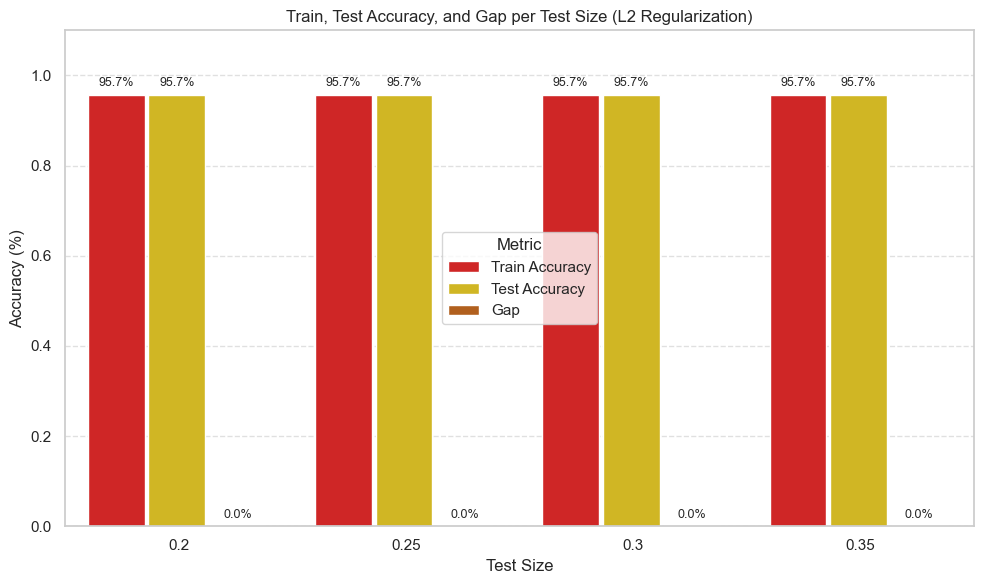

In [133]:
# Step 2: Print the summary for best C for each test size
print("\nSummary of Best C for Each Test Size (L2, Least Overfitting):")
for result in svm_l2_results:
    print(f"Test Size: {result[0]:<5}, Best C: {result[1]:<6}, Train: {result[2]*100:6.2f}%, "
          f"Test: {result[3]*100:6.2f}%, Gap: {result[4]*100:5.2f}%")

# Print out the averaged accuracies
print(f"\nBest Test Size: {svm_l2_best_test_size}, Best C: {svm_l2_best_C}")
print(f"\nFinal Average Train Accuracy (over random states 0-51): {svm_l2_avg_train_acc_final * 100:.2f}%")
print(f"Final Average Test Accuracy (over random states 0-51): {svm_l2_avg_test_acc_final * 100:.2f}%")

# Convert results to DataFrame
summary_df = pd.DataFrame(svm_l2_results, columns=["Test Size", "Best C", "Train Accuracy", "Test Accuracy", "Gap"])

# Melt for Seaborn
melted = summary_df.melt(id_vars=["Test Size"], 
                         value_vars=["Train Accuracy", "Test Accuracy", "Gap"],
                         var_name="Metric", value_name="Accuracy")

color_palette = {
    "Train Accuracy": "#eb0a0a",
    "Test Accuracy": "#ecca08",  # softer red
    "Gap": "#ca5e05"
}

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=melted, x="Test Size", y="Accuracy", hue="Metric", 
                 palette=color_palette, dodge=True)

# Make bars thin
for container in ax.containers:
    for bar in container:
        bar.set_width(0.25)

# Add percentage labels on top
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        ax.annotate(f'{height * 100:.1f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 4),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

# Final styling
plt.title("Train, Test Accuracy, and Gap per Test Size (L2 Regularization)")
plt.ylabel("Accuracy (%)")
plt.xlabel("Test Size")
plt.ylim(0, 1.1)
plt.legend(title="Metric")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

##### Training Evaluation

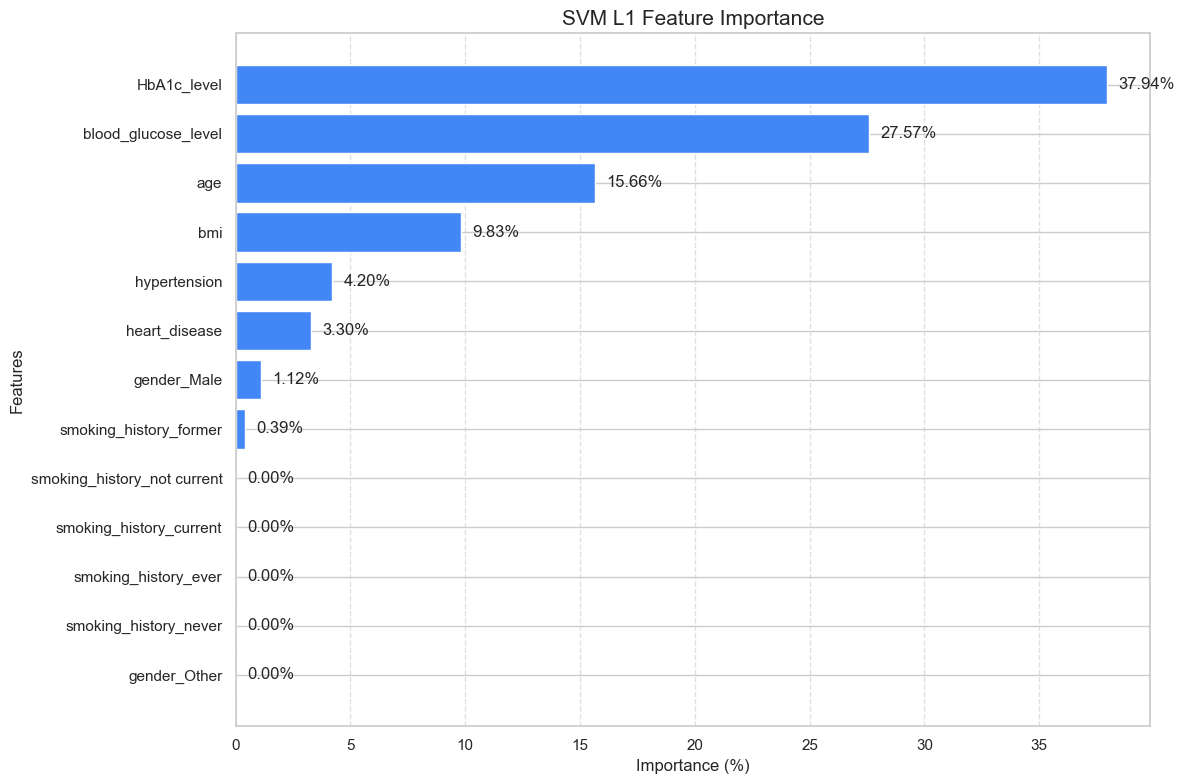


SVM L1 Feature Importance (sorted by importance):
  Rank 1: HbA1c_level - 37.94%
  Rank 2: blood_glucose_level - 27.57%
  Rank 3: age - 15.66%
  Rank 4: bmi - 9.83%
  Rank 5: hypertension - 4.20%
  Rank 6: heart_disease - 3.30%
  Rank 7: gender_Male - 1.12%
  Rank 8: smoking_history_former - 0.39%
  Rank 9: smoking_history_not current - 0.00%
  Rank 10: smoking_history_current - 0.00%
  Rank 11: smoking_history_ever - 0.00%
  Rank 12: smoking_history_never - 0.00%
  Rank 13: gender_Other - 0.00%


In [134]:
# Create a horizontal bar chart for SVM L1 feature importance
plt.figure(figsize=(12, 8))

# Calculate percentage importance
svm_l1_feature_importance_percent = 100 * svm_l1_best_feature_importance / svm_l1_best_feature_importance.sum()

# Create sorted data for plotting (descending order)
sorted_idx = np.argsort(svm_l1_feature_importance_percent)[::-1]
sorted_features = [X.columns[i] for i in sorted_idx]
sorted_importance = svm_l1_feature_importance_percent[sorted_idx]

# Reverse the order so highest appears at the top of the plot
sorted_features = sorted_features[::-1]
sorted_importance = sorted_importance[::-1]

# Plot horizontal bars
bars = plt.barh(range(len(sorted_features)), sorted_importance, align='center', color='#4287f5')
plt.yticks(range(len(sorted_features)), sorted_features)

# Add percentage labels to the bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 0.5, 
             bar.get_y() + bar.get_height()/2, 
             f'{sorted_importance[i]:.2f}%', 
             ha='left', 
             va='center',
             fontweight='regular')

# Update title and labels to match the SVM L1 model
plt.title('SVM L1 Feature Importance', fontsize=15)
plt.xlabel('Importance (%)', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Add grid for better readability
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Print the ranked feature importances
print("\nSVM L1 Feature Importance (sorted by importance):")
for i, idx in enumerate(sorted_idx):
    print(f"  Rank {i + 1}: {X.columns[idx]} - {svm_l1_feature_importance_percent[idx]:.2f}%")

## Comparison of Different Models


Evaluating Test Size: 0.2

Evaluating Test Size: 0.25

Evaluating Test Size: 0.3

Evaluating Test Size: 0.35


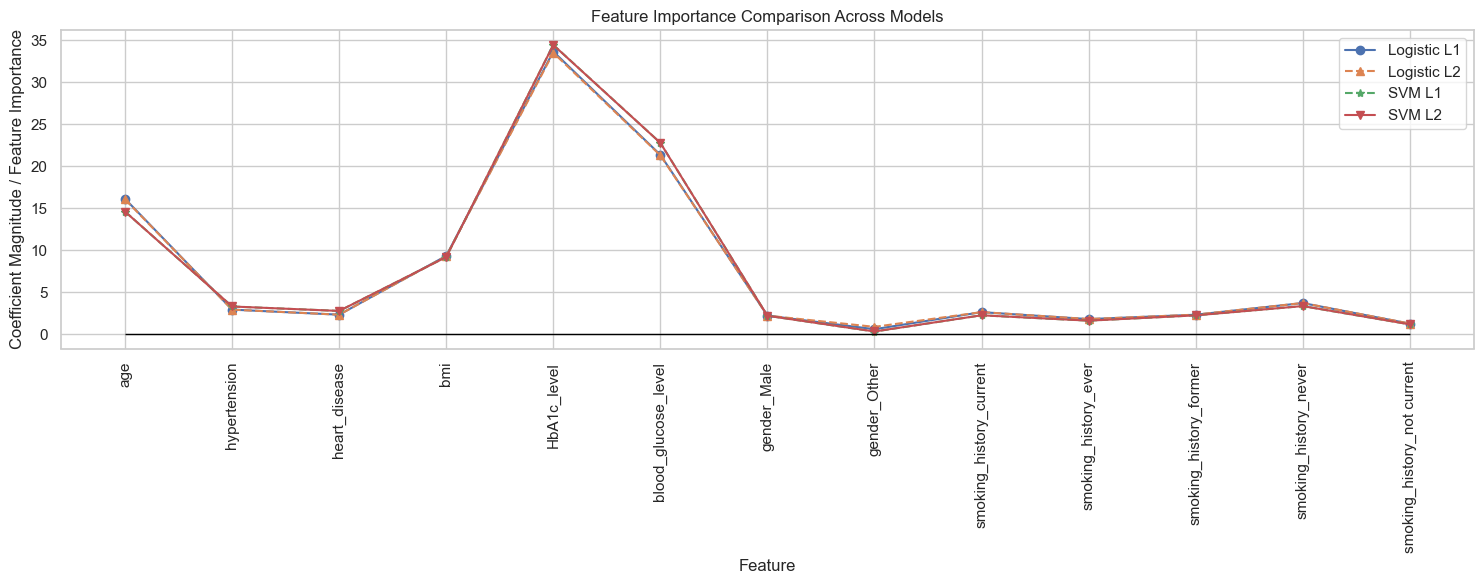

In [135]:
# Test sizes and random states to evaluate the models
test_sizes = [0.2, 0.25, 0.3, 0.35]
random_states = range(0, 2) # Changed to 31 for more iterations

# Initialize lists to store results for feature importance
log_l1_importance_percent_list = []
log_l2_importance_percent_list = []
svm_l1_importance_percent_list = []
svm_l2_importance_percent_list = []

# Function to evaluate models
def evaluate_model(test_size, random_state, X, y, model_type):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Scale the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Choose the model type
    if model_type == 'log_l1':
        model = LogisticRegression(penalty='l1', solver='liblinear', max_iter=10000)
    elif model_type == 'log_l2':
        model = LogisticRegression(penalty='l2', solver='liblinear', max_iter=10000)
    elif model_type == 'svm_l1':
        model = LinearSVC(penalty='l1', dual=False, max_iter=10000)
    elif model_type == 'svm_l2':
        model = LinearSVC(penalty='l2', dual=False, max_iter=10000)
    
    model.fit(X_train_scaled, y_train)
    
    # Accuracy scores
    train_acc = accuracy_score(y_train, model.predict(X_train_scaled))
    test_acc = accuracy_score(y_test, model.predict(X_test_scaled))
    
    # Feature importances (absolute values of coefficients)
    feature_importance = np.abs(model.coef_[0])
    
    return train_acc, test_acc, feature_importance

# Loop over test sizes
for test_size in test_sizes:
    print(f"\nEvaluating Test Size: {test_size}")
    
    # Lists to store the feature importance averages
    log_l1_importance_percent_avg = []
    log_l2_importance_percent_avg = []
    svm_l1_importance_percent_avg = []
    svm_l2_importance_percent_avg = []
    
    for model_type in ['log_l1', 'log_l2', 'svm_l1', 'svm_l2']:
        importance_list = []
        train_accs = []
        test_accs = []
        
        for random_state in random_states:
            train_acc, test_acc, feature_importance = evaluate_model(test_size, random_state, X, y, model_type)
            importance_list.append(feature_importance)
            train_accs.append(train_acc)
            test_accs.append(test_acc)
        
        # Average feature importance
        avg_feature_importance = np.mean(importance_list, axis=0)
        avg_train_acc = np.mean(train_accs)
        avg_test_acc = np.mean(test_accs)
        
        if model_type == 'log_l1':
            log_l1_importance_percent_avg.append(100 * avg_feature_importance / avg_feature_importance.sum())
        elif model_type == 'log_l2':
            log_l2_importance_percent_avg.append(100 * avg_feature_importance / avg_feature_importance.sum())
        elif model_type == 'svm_l1':
            svm_l1_importance_percent_avg.append(100 * avg_feature_importance / avg_feature_importance.sum())
        elif model_type == 'svm_l2':
            svm_l2_importance_percent_avg.append(100 * avg_feature_importance / avg_feature_importance.sum())

# Step 2: Create DataFrame with All Model Importances
feature_names = X.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Logistic_L1': np.mean(log_l1_importance_percent_avg, axis=0),
    'Logistic_L2': np.mean(log_l2_importance_percent_avg, axis=0),
    'SVM_L1': np.mean(svm_l1_importance_percent_avg, axis=0),
    'SVM_L2': np.mean(svm_l2_importance_percent_avg, axis=0)
})

# Step 3: Average Feature Importance and Create Plot
importance_df['Average'] = importance_df[['Logistic_L1', 'Logistic_L2', 'SVM_L1', 'SVM_L2']].mean(axis=1)

# Plot setup
plt.figure(figsize=(15, 6))

# Plot feature importance for each model with different markers and line styles
plt.plot(importance_df['Logistic_L1'], '-o', label="Logistic L1", markersize=6)
plt.plot(importance_df['Logistic_L2'], '--^', label="Logistic L2", markersize=6)
plt.plot(importance_df['SVM_L1'], '--*', label="SVM L1", markersize=6)
plt.plot(importance_df['SVM_L2'], '-v', label="SVM L2", markersize=6)

# Set feature names on the x-axis
plt.xticks(range(len(feature_names)), feature_names, rotation=90)

# Add horizontal line at y=0 (this can show the baseline for positive/negative importance)
plt.hlines(0, 0, len(feature_names)-1, colors='black', linewidth=1)

# Labels and title
plt.xlabel("Feature")
plt.ylabel("Coefficient Magnitude / Feature Importance")
plt.title("Feature Importance Comparison Across Models")
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [144]:
# Model labels and accuracy values
models = ['KNN', 'Logistic Regression L2', 'Logistic Regression L1', 'SVM L2', 'SVM L1']
train_accuracies = [
    best_knn_train_acc * 100,
    log_l2_best_train_accuracy * 100,
    Log_l1_avg_train_acc_final * 100,
    svm_l2_avg_train_acc_final * 100,
    svm_l1_best_train_acc * 100
]
test_accuracies = [
    best_knn_test_acc * 100,
    log_l2_best_test_accuracy * 100,
    Log_l1_avg_test_acc_final * 100,
    svm_l2_avg_test_acc_final * 100,
    svm_l1_best_test_acc * 100
]

# Create long-form DataFrame for seaborn
data_dict = {
    'Model': models * 2,
    'Accuracy': train_accuracies + test_accuracies,
    'Type': ['Train'] * len(models) + ['Test'] * len(models)
}

# Convert to DataFrame
df = pd.DataFrame(data_dict)

# Single-line title
title = (
    # f"Comparison between KNN (k = {best_knn_k}), "
    f"Logistic Regression L2 (C = {log_l2_best_C}), "
    f"Logistic Regression L1 (C = {Log_l1_best_C}), "
    f"SVM L2 (C = {svm_l2_best_C}), "
    f"SVM L1 (C = {svm_l1_best_C})"
)

# Plot
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x='Model', y='Accuracy', hue='Type', data=df, palette=['royalblue', 'salmon'])

# Add labels on bars
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 4),
                    textcoords='offset points',
                    ha='center', va='bottom', fontsize=9)

# Title and formatting
plt.title(title, fontsize=13, pad=20)  # pad increases space between title and plot
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
plt.legend(title='Data Type')
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # push the plot down a bit

plt.show()

NameError: name 'best_knn_train_acc' is not defined

In [145]:
# Initialize storage for errors
model_names = ["KNN", "Logistic Regression L2", "Logistic Regression L1", "SVM L2", "SVM L1"]
error_totals = {name: {"MAE": 0, "MSE": 0, "RMSE": 0} for name in model_names}

# Loop through random states
for state in range(51):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=best_knn_test_size, random_state=state)

    # KNN
    knn = KNeighborsClassifier(n_neighbors=best_knn_k)
    knn.fit(X_train, y_train)
    pred_knn = knn.predict(X_test)

    # Logistic Regression L2
    log_l2 = LogisticRegression(penalty='l2', C=log_l2_best_C, solver='liblinear')
    log_l2.fit(X_train, y_train)
    pred_log_l2 = log_l2.predict(X_test)

    # Logistic Regression L1
    log_l1 = LogisticRegression(penalty='l1', C=Log_l1_best_C, solver='liblinear')
    log_l1.fit(X_train, y_train)
    pred_log_l1 = log_l1.predict(X_test)

    # SVM L2
    svm_l2 = LinearSVC(penalty='l2', C=svm_l2_best_C, dual=False, max_iter=10000)
    svm_l2.fit(X_train, y_train)
    pred_svm_l2 = svm_l2.predict(X_test)

    # SVM L1
    svm_l1 = LinearSVC(penalty='l1', C=svm_l1_best_C, dual=False, max_iter=10000)
    svm_l1.fit(X_train, y_train)
    pred_svm_l1 = svm_l1.predict(X_test)

    # Compute errors
    preds = [pred_knn, pred_log_l2, pred_log_l1, pred_svm_l2, pred_svm_l1]
    for name, pred in zip(model_names, preds):
        mae = mean_absolute_error(y_test, pred)
        mse = mean_squared_error(y_test, pred)
        rmse = np.sqrt(mse)

        error_totals[name]["MAE"] += mae
        error_totals[name]["MSE"] += mse
        error_totals[name]["RMSE"] += rmse

# Average the results
avg_errors = {
    "Model": [],
    "MAE": [],
    "MSE": [],
    "RMSE": []
}

for name in model_names:
    avg_errors["Model"].append(name)
    avg_errors["MAE"].append(error_totals[name]["MAE"] / 51)
    avg_errors["MSE"].append(error_totals[name]["MSE"] / 51)
    avg_errors["RMSE"].append(error_totals[name]["RMSE"] / 51)

# Display as DataFrame
error_df = pd.DataFrame(avg_errors)
print(error_df.to_string(index=False))

NameError: name 'best_knn_test_size' is not defined